# Lecture 7: Unconstrained optimization, 1D search methods

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
from func import Func
from search1d import GoldenSectionSearch, FibonacciSearch

# Inline plotting
%matplotlib inline

# Make sympy print pretty math expressions
sy.init_printing()

We are interested in the problem of minimizing an objective function $f : \mathbb{R} \to \mathbb{R}$ (i.e., a one-dimensional problem)

There are multiple search method for 1D:
- Golden section Search ($f$). Slow but slow and robust.
- Newton Method more efficient but needs more information ($f, f', f^{''}$)

## Golden Section Search

<img src="figures/lecture-07/figure-7.1.png" width="400" />


The Golden Section Search allows us to determine the minimizer of an objective function $f: \mathbb{R} \to \mathbb{R}$ over a closed interval, say $[a_0, b_0]$ The only property that we assume of the objective function $f$ is that it is **unimodal**, which means that $f$ has only one local minimizer in that interval.

Before starting the algorithm, we have to make sure that the unimodel. 

The idea is not to find the exact value. We want to make the uncertaintly interval smaller and smaller and stop the that interval is of relatively small size.

<img src="figures/lecture-07/figure-7.3.png" width="600" />


We choose two intermediate points in such a way that an approximation to the minimizer of $f$ may be achieved in as few evaluations as possible. We choose the intermediate points $a_1$ and $b_1$ in such a way that the reduction in the range
is symmetric:

$$
a_1 = a_0 + \rho(b_0 - a_0)\\
b_1 = a_0 + (1-\rho)(b_0 - a_0)
$$

where the symbols $\rho$ and $1-\rho$ (the Golden ration) are constants:

$$
\rho = \frac{3- \sqrt{5}}{2} \approx 0.382, \hspace{5mm} 1-\rho=\frac{\sqrt{5}-1}{2} \approx 0.61803
$$

Next, we evaluate $f$ at the two intermediate points $a_1$ and $b_1$ i.e., $f(a_1)$ and $f(b_1)$.

- If $f(a_1) < f(b_1)$ then we continue with the next iteration from the interval $[a_0, b_1]$
- If $f(a_1) > f(b_1)$ then we continue with the next iteration from the interval $[a_1, b_0]$

<img src="figures/lecture-07/figure-7.4.png" width="600" />


In the Golden Section Search, the size of the next interval is fixed. The value of $\rho$ is fixed. 

The length of the interval is 1 (otherwise just make it so it is 1).



---
## Example 7.1

<img src="figures/lecture-07/example-7.1.png" width="600" />


In [4]:
def example71(x):
    return x**4 - 14*x**3 + 60*x**2 - 70*x

example71 = GoldenSectionSearch(
    example71, initial_range=(0, 2), uncertainty=0.3
)

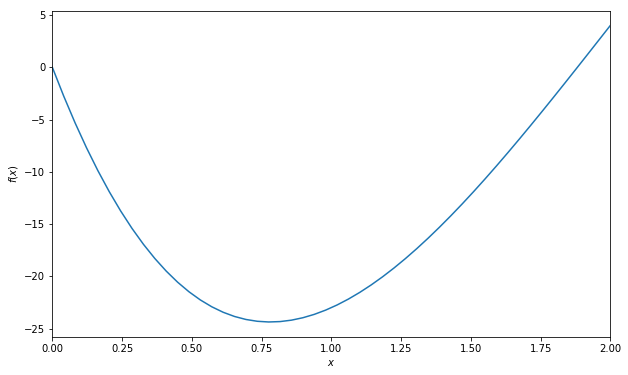

In [5]:
example71.plot()

In [6]:
example71.estimate_iterations()

4

In [11]:
example71.run(num_iterations=4)

$k$,$a_k$,$b_k$,$f(a_k)$,$f(b_k)$,Uncertainty interval
1,0.7639,1.2361,-24.3607,-18.9582,"[0.0000, 1.2361]"
2,0.4721,0.7639,-21.0985,-24.3607,"[0.4721, 1.2361]"
3,0.7639,0.9443,-24.3607,-23.5925,"[0.4721, 0.9443]"
4,0.6525,0.7639,-23.8374,-24.3607,"[0.6525, 0.9443]"


---
## Fibonacci Search

In the Fib search, we do not insist on a fixed $\rho$ in each iteration. In each iteration $k$, we compute a new $\rho_k$. 

In the long run, the Fib search method is more efficient than the Golden Search method.

<img src="figures/lecture-07/figure-7.5.png" width="600" />


<img src="figures/lecture-07/slide-6.png" width="600" />


We want to minimize the uncertainty range because $(1-\rho_k)$ is the reduction of the uncertainty range for iteration $k$. Multiplying them together, we find the reduction of the uncertainty range for $N$ iterations.

---
## Bisection Method

The idea is to split the interval in the middle $(b_0-a_0)/2$. Then we compute the derivative of that point $f'((b_0-a_0)/2)$. If the slope is negative then pick the right interval otherwise pick the left interval.

Normally, the derivative is error-prone. It is more efficent. In each iteration, we reduce the interval by half. 

---
## Example 7.2

<img src="figures/lecture-07/example-7.2.png" width="600" />


In [6]:
def example72(x):
    return x**4 - 14*x**3 + 60*x**2 - 70*x

example72 = FibonacciSearch(
    example72, initial_range=(0, 2), uncertainty=0.3, epsilon=0.05
)

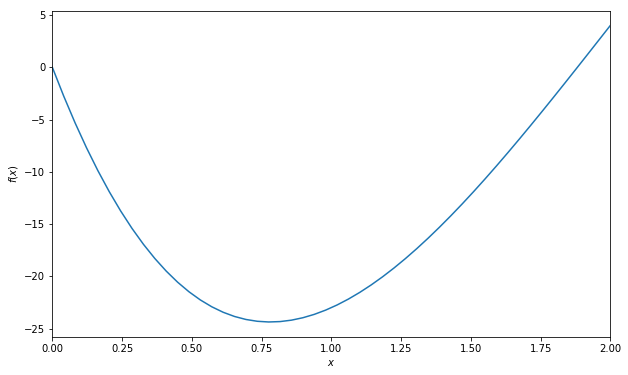

In [7]:
example72.plot()

In [8]:
example72.estimate_iterations()

In [9]:
example72.run(num_iterations=4)

$k$,$a_k$,$b_k$,$f(a_k)$,$f(b_k)$,Uncertainty interval
1,0.7500,1.2500,-24.3398,-18.6523,"[0.0000, 1.2500]"
2,0.5000,0.7500,-21.6875,-24.3398,"[0.5000, 1.2500]"
3,0.7500,1.0000,-24.3398,-23.0000,"[0.5000, 1.0000]"
4,0.7250,0.7500,-24.2713,-24.3398,"[0.7250, 1.0000]"


---
## Lecture Example

Try out the first 2 iteration of the Golden Search method for the function $f(x) = x^2 - 2x + 2$ on the interval $[0, 2]$. How much is the uncertainty reduce in 2 iterations?

In [12]:
def lecture_example(x):
    return x**2 - 2*x + 2

lecture_example = GoldenSectionSearch(
    lecture_example, initial_range=(0, 2), uncertainty=0.3
)

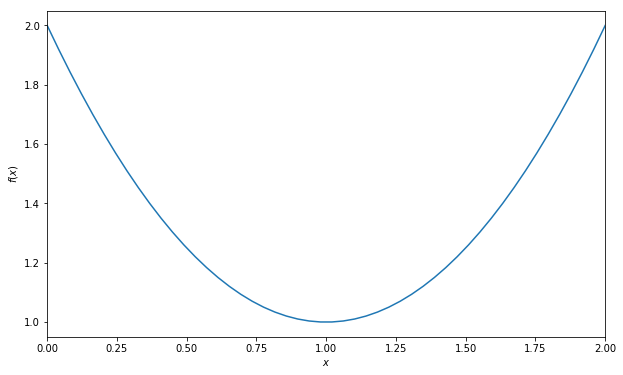

In [13]:
lecture_example.plot()

In [3]:
lecture_example.run(2)

$k$,$a_k$,$b_k$,$f(a_k)$,$f(b_k)$,Uncertainty interval
1,0.7639,1.2361,1.0557,1.0557,"[0.0000, 0.0000]"
2,0.7639,1.2361,1.0557,1.0557,"[0.0000, 0.0000]"


---
## Newtons Method 1D


This method is the most efficient. 

A second order Tayler expansion of the function $f(x)$. Note that $x_0$ is a fixed point. Expanding at $x_0$ we get a second-order polynomial.

$$
f(x) = f(x) + \frac{1}{1!} f'(x_0)(x-x_0) + \frac{1}{2!} f^{''}(x_0)(x-x_0)^2
$$

Cosine or Logarithm functions are implemented in the computer as Taylor approximations because in the computer we only have add and mul instructions. 

The idea in Newtons Method is to make an approximation of the function $f(x)$ and find the minimum of the approximated function $q$. This can be done by taking the derivative of $q(x)$ and solving it for when $q'(x) = 0$.

We can derive the Newton Formula:

<img src="figures/lecture-07/newtons-formula.png" width="200" />


<img src="figures/lecture-07/example-7.4.png" width="600" />


The function above is complicated. Finding the solution $f'(x)=0$ is really difficult. A better way to use the Newton's method to find a solution iteratively. 

$$
f'(x) = x-\cos(x) \\
f^{''}(x) = 1 + \sin(x)
$$

Our update method for finding the extreme point becomes as follows:

$$
x_{k+1} = x_k - \frac{x_k - \cos(x_k)}{1 + \sin(x)}
$$

It is important to find a good starting point. If the starting point is bad then the method may not converge.

In [ ]:
def example_74(x):
    return x**2 - 2*x + 2

example_74 = NewtonSearch(
    example_74, initial_range=(0, 2), uncertainty=0.3
)

### Tangent method for root finding in $g(x)$

The method can also be using to find zeros (root). Previously, we found zeros in $g(x) = f'(x)$.

The issue for the tangent method is that it can go to other side.

<img src="figures/lecture-07/figure-7.8.png" width="600" />


<img src="figures/lecture-07/example-7.5.png" width="600" />


---
## Secant Method

In this method, we approximate the derivative of the given function in case, we cannot the derivative is not available.

### Minimisation of $f(x)$

<img src="figures/lecture-07/secant-method.png" width="600" />


We can approximate the derivative of the function:

$$
f'(x) = \frac{ f(x^{k}) - f(x^{k-1}) }{x^{k} - x^{k-1}} \\\\
f''(x) = \frac{ f'(x^{k}) - f'(x^{k-1}) }{x^{k} - x^{k-1}} \\
$$

In this way, we don't need the derivative or the second derivative. 

The starting point is always tricky. If a bad starting point is chosen we may end up in a situation where it does not converge.

### Secant method to find roots

<img src="figures/lecture-07/secant-method-root.png" width="600" />




<img src="figures/lecture-07/figure-7.10.png" width="600" />


<img src="figures/lecture-07/example-7.6.png" width="600" />


<img src="figures/lecture-07/example-7.6-result.png" width="600" />


<img src="figures/lecture-07/example-7.7-a.png" width="600" />
<img src="figures/lecture-07/example-7.7-b.png" width="600" />


We cannot use a linear method. Therefore, we need to use the Secant method or Newton Method.  

Typically, in Deep Learning, Newton is not used because $f''$ is difficult to compute. Also, the Newton method is more suspetible to noise in the data.